In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import platform
import pathlib

In [176]:
## Paths Input Here
if platform.uname().system == 'Darwin': #------------------------------Mac OS X---------------------------------------------------------------
    conn_path = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/matrix_corrMx_AvgR.csv'
    clin_path = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/patient_data/AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    out_dir = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/figures/multidimensional_scatterplots'
    #out_dir = r'path to out dir here'
    x_roi_names = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Mac style')
else: #----------------------------------------------------------------Windows----------------------------------------------------------------
    conn_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_AvgR.csv'
    clin_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\patient_data\AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    print(pathlib.Path(os.path.join(base,conn_path)))
    out_dir = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\AD_to_memory_net'
    #out_dir = r'path to out dir here'
    x_roi_names = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Windows style')

I have set pathnames in the Mac style


## Import Connectivity Values

In [177]:
try:
    name_df = pd.read_csv(x_roi_names, names=['arb'], header=None)
    name_df.tail(5)
    colnames = name_df.arb.values.tolist()
    newname = []
    for name in colnames:
        arb = os.path.basename(name).split('.nii')[0]
        arb = arb[0:8]
        newname.append(arb)
    #print('NAMES: ', newname)

    x_df = pd.read_csv(conn_path, names=newname, header=None)#, ignore_index=True)
    x_df.index = newname
    x_df = x_df.iloc[8:,:8]
    x_df = x_df.reset_index(drop=True)
except:
    print('excepted')
    x_df = pd.read_csv(conn_path)
    colnames = x_df.columns.values
    newname = []
    for name in colnames:
        arb = os.path.basename(name).split('.nii')[0]
        arb = arb[0:8]
        newname.append(arb)
    x_df = x_df.set_axis(newname, axis=1, inplace=False)
    try:
        x_df.pop('Unnamed:')
    except:
        print('no x_df.pop(<name>) column to pop')


corr_df = x_df
corr_df.tail(3)

,00_memor,01_visua,02_somat,03_dorsa,04_ventr,05_limbi,06_front,07_defau
47,0.225163,-0.046054,-0.072667,-0.124370,-0.130400,0.302641,-0.127573,0.079391
48,0.228022,-0.041221,-0.076253,-0.123747,-0.141397,0.323542,-0.139500,0.074099
49,0.282438,-0.094408,-0.085608,-0.171892,-0.103193,0.225186,-0.077495,0.130953


In [178]:
#Assess connectivity values fundamentally
corr_description = corr_df.describe().transpose()
display(corr_description)

,count,mean,std,min,25%,50%,75%,max
00_memor,50.0,0.205354,0.044503,0.083375,0.174892,0.205535,0.234225,0.294498
01_visua,50.0,-0.045786,0.023526,-0.104341,-0.063749,-0.042132,-0.029745,0.001312
02_somat,50.0,-0.062143,0.020456,-0.107202,-0.078273,-0.059283,-0.047083,-0.027711
03_dorsa,50.0,-0.117958,0.031914,-0.184950,-0.138649,-0.115135,-0.096726,-0.030816
04_ventr,50.0,-0.116727,0.024494,-0.148808,-0.134395,-0.125414,-0.103286,-0.033823
05_limbi,50.0,0.283589,0.082985,-0.039611,0.245888,0.293108,0.334439,0.465591
06_front,50.0,-0.114568,0.041048,-0.172746,-0.146277,-0.126292,-0.087907,0.018306
07_defau,50.0,0.078468,0.033653,0.002173,0.058477,0.073367,0.097965,0.172278


In [179]:
#Visualize fundamental relations of the connectivity values
# corrfig = sns.pairplot(corr_df)
# corrfig

## Import Clinical Outcomes

In [180]:
#important metrics: 
# pt_id, randomization arm, age at DOS,
# baseline adas cog 11, baseline CDR
# %change adas cog 11, # change CDR


sheet_name = 'AD_Clinical_Scores'
alphab_cols = 'C, D, E, F, G, J, V'
clin_df = pd.read_excel(clin_path, sheet_name=sheet_name, usecols=alphab_cols, nrows=50)
print('Num NaNs: ', clin_df.isna().sum().sum())
# clin_df.tail(5)
display(clin_df[::2])

Num NaNs:  32


,Randomization Arm,"Patient # CDR, ADAS",Age at DOS,Baseline ADAS-Cog11,Baseline CDR (sum of squares),% Change from baseline (ADAS-Cog11),% Change from baseline (CDR)
0,sham-stim,101,62,28.0,5.0,-21.428571,-40.000000
2,sham-stim,103,76,19.0,7.0,-78.947368,-42.857143
4,NaN,105,50,19.0,NaN,-10.526316,NaN
6,NaN,107,64,13.0,NaN,-15.384615,NaN
8,sham-stim,109,72,23.0,9.0,-30.434783,-44.444444
10,NaN,111,62,12.0,NaN,41.666667,NaN
12,stim-sham,113,69,15.0,5.5,-60.000000,-100.000000
14,NaN,115,60,29.0,NaN,-48.275862,NaN
16,sham-stim,118,52,32.0,6.0,-3.125000,-100.000000
18,NaN,1201,78,19.6,NaN,-7.142857,NaN


In [181]:
## Organize the clinical dataframe
clin_df = clin_df.sort_values(by=['Patient # CDR, ADAS'], kind='quicksort', axis=0, ascending=True, ignore_index=True)
clin_df.tail(10)

,Randomization Arm,"Patient # CDR, ADAS",Age at DOS,Baseline ADAS-Cog11,Baseline CDR (sum of squares),% Change from baseline (ADAS-Cog11),% Change from baseline (CDR)
40,stim-sham,144,79,13.0,3.0,-61.538462,-133.333333
41,stim-sham,145,74,18.0,3.5,5.555556,-100.000000
42,sham-stim,146,76,11.0,4.0,-54.545455,-50.000000
43,stim-sham,147,59,21.0,3.0,-4.761905,-100.000000
44,stim-sham,148,51,13.0,3.5,-207.692308,-157.142857
45,sham-stim,149,77,10.0,5.0,-90.000000,-20.000000
46,sham-stim,150,71,22.0,4.5,13.636364,0.000000
47,NaN,1201,78,19.6,NaN,-7.142857,NaN
48,NaN,1202,74,13.3,NaN,-2.255639,NaN
49,NaN,1203,76,24.0,NaN,-73.333333,NaN


In [182]:
##One-hot-encode the dataframe | sham=0 stim=1 
shams = (clin_df['Randomization Arm'] == 'sham-stim')
clin_df.loc[shams, 'Randomization Arm'] = 0
stims = (clin_df['Randomization Arm'] == 'stim-sham')
clin_df.loc[stims, 'Randomization Arm'] = 1
clin_df.tail(10)

,Randomization Arm,"Patient # CDR, ADAS",Age at DOS,Baseline ADAS-Cog11,Baseline CDR (sum of squares),% Change from baseline (ADAS-Cog11),% Change from baseline (CDR)
40,1,144,79,13.0,3.0,-61.538462,-133.333333
41,1,145,74,18.0,3.5,5.555556,-100.000000
42,0,146,76,11.0,4.0,-54.545455,-50.000000
43,1,147,59,21.0,3.0,-4.761905,-100.000000
44,1,148,51,13.0,3.5,-207.692308,-157.142857
45,0,149,77,10.0,5.0,-90.000000,-20.000000
46,0,150,71,22.0,4.5,13.636364,0.000000
47,NaN,1201,78,19.6,NaN,-7.142857,NaN
48,NaN,1202,74,13.3,NaN,-2.255639,NaN
49,NaN,1203,76,24.0,NaN,-73.333333,NaN


In [183]:
## Develop Understanding of the Clinical Data
try:
    clin_description = clin_df.describe().transpose()
    display(clin_description)
except:
    print('Failed to describe clinical dataframe, unknown cause')

,count,mean,std,min,25%,50%,75%,max
"Patient # CDR, ADAS",50.0,189.920000,258.695695,101.000000,113.250000,126.500000,140.750000,1203.000000
Age at DOS,50.0,67.480000,7.985293,47.000000,62.000000,69.000000,73.750000,79.000000
Baseline ADAS-Cog11,50.0,19.238000,5.600688,10.000000,15.250000,18.500000,22.000000,35.000000
Baseline CDR (sum of squares),40.0,4.787500,1.727929,1.000000,3.500000,5.000000,5.500000,9.000000
% Change from baseline (ADAS-Cog11),50.0,-35.563519,48.852186,-207.692308,-61.153846,-28.472222,-3.430707,54.545455
% Change from baseline (CDR),38.0,-73.831483,79.163640,-400.000000,-100.000000,-59.615385,-21.250000,11.111111


In [184]:
## Visualize the Data Relationships
# clinfig = sns.pairplot(clin_df)
# clinfig

## Merge DFs

In [185]:
corrd_df = corr_df.reset_index()
total_df = pd.concat([clin_df, corr_df], axis=1)
display(total_df)

,Randomization Arm,"Patient # CDR, ADAS",Age at DOS,Baseline ADAS-Cog11,Baseline CDR (sum of squares),% Change from baseline (ADAS-Cog11),% Change from baseline (CDR),00_memor,01_visua,02_somat,03_dorsa,04_ventr,05_limbi,06_front,07_defau
0,0,101,62,28.0,5.0,-21.428571,-40.000000,0.155809,-0.016067,-0.037287,-0.097985,-0.133136,0.368843,-0.161642,0.050232
1,1,102,77,22.0,6.5,-36.363636,-69.230769,0.173658,-0.039878,-0.032239,-0.129030,-0.131156,0.465591,-0.171597,0.077686
2,0,103,76,19.0,7.0,-78.947368,-42.857143,0.191375,-0.032546,-0.036808,-0.118963,-0.139225,0.368452,-0.161276,0.082011
3,1,104,65,17.0,7.0,-129.411765,-71.428571,0.159578,-0.015783,-0.062662,-0.088505,-0.130241,0.322597,-0.139443,0.039187
4,NaN,105,50,19.0,NaN,-10.526316,NaN,0.144300,-0.048057,-0.090870,-0.085284,-0.078547,0.215256,-0.057259,0.028220
5,1,106,66,13.0,3.0,-38.461538,-50.000000,0.197998,-0.022790,-0.044253,-0.106363,-0.144834,0.327426,-0.157877,0.072634
6,NaN,107,64,13.0,NaN,-15.384615,NaN,0.154363,-0.042301,-0.086612,-0.089494,-0.096292,0.244718,-0.085726,0.031619
7,NaN,108,60,24.0,NaN,-29.166667,NaN,0.163638,-0.053981,-0.097731,-0.099889,-0.088261,0.232628,-0.065393,0.042303
8,0,109,72,23.0,9.0,-30.434783,-44.444444,0.239486,-0.064388,-0.052075,-0.148891,-0.134814,0.352712,-0.137391,0.113133
9,0,110,72,13.0,5.0,-84.615385,-80.000000,0.207923,-0.041962,-0.056562,-0.104225,-0.112208,0.215980,-0.097356,0.076609


In [186]:
#Handle NaNs
total_df = total_df.fillna(method='ffill')
print('Num NaNs: ', total_df.isna().sum().sum())

Num NaNs:  0


In [187]:
#Generate metrics for udnerstanding
try:
    total_desc = total_df.describe().transpose()
    total_desc
except:
    print('Failed to generate total metrics, unkown cause')

In [188]:
#Generate visual relationship of total metrics
# total_pairplot = sns.pairplot(total_df)
# total_pairplot

## Generate Subrouping Metric

In [189]:
#subgrouping by age
metric = 'Age at DOS'
metric_val = 65

index_one = (total_df[metric] > metric_val) #example, all individuals over 65
index_two = (total_df[metric] <= metric_val) #example, all individuals under/equal to 65

##Example of how to use these indices to manipulate data:
#### clin_df.loc[index_one, '<names of relevant columns>'] = 0 ## can use iloc too. 

## Decide What to Plot

In [190]:
## Choose variables of interest.
x_name = '06_front'
y_name = '04_ventr'
z_name = '% Change from baseline (ADAS-Cog11)' #--------------------------------------------------------This variable is the outcome variable

x_vals = total_df[x_name]
y_vals = total_df[y_name]
z_vals = total_df[z_name]#------------------------------------------------------------------------------This variable is the outcome variable


In [191]:
#2D Line of Best Fit Code
def lin_regression(x, y, z, degree):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    from scipy.stats import pearsonr

    #----Generate Model
    #Prep data
    x = x
    y = y
    z = z
    input_matrix = np.stack([x, y]).T

    #Linear Regression
    poly = PolynomialFeatures(degree=degree)
    model = LinearRegression()
    in_features = poly.fit_transform(input_matrix)
    model.fit(in_features, z)
    predicted_z = model.predict(poly.transform(input_matrix))

    #----Performance Metrics
    #Pearson of Predicted Z to Actual Z
    r, p = pearsonr(predicted_z, z) #need to find the prediction points at the x/y for each z_actual
    print('r: ', r)
    print('p: ', p)
    #Coefficients of the Regression
    coefficients = dict(zip(poly.get_feature_names_out(), model.coef_.round(4)))
    print('coeff: ', coefficients)
    #Check Fit
    r_squared = model.score(poly.transform(input_matrix), z)
    print('r2: ', r_squared)

    #----Generate Planes for Plotting
    x_lin=np.linspace(np.min(x), np.max(x), 100)
    y_lin=np.linspace(np.min(y), np.max(y), 100)
    X_plane,Y_plane=np.meshgrid(x_lin,y_lin,copy=False)
    input_planes=np.stack([X_plane.flatten(),Y_plane.flatten()]).T
    assert(input_planes.shape==(100*100, 2)) #unsure what shape 400,2 refers to
    predicted_plane = model.predict(poly.transform(input_planes))

    return coefficients, r_squared, r, p, X_plane, Y_plane, predicted_plane.reshape(100,100)


## 3D Plots (No Subgroups)

r:  0.1891941415633953
p:  0.18821153585598982
coeff:  {'1': 0.0, 'x0': 593.68, 'x1': -672.7395}
r2:  0.03579442320190995
r:  0.1891941415633953
p:  0.18821153585598982
coeff:  {'1': 0.0, 'x0': 593.68, 'x1': -672.7395}
r2:  0.03579442320190995
r:  0.1891941415633953
p:  0.18821153585598982
coeff:  {'1': 0.0, 'x0': 593.68, 'x1': -672.7395}
r2:  0.03579442320190995


Text(0.5, 0.98, '06_front vs 04_ventr R2:0.03579442320190995|r:0.1891941415633953|p:0.18821153585598982')

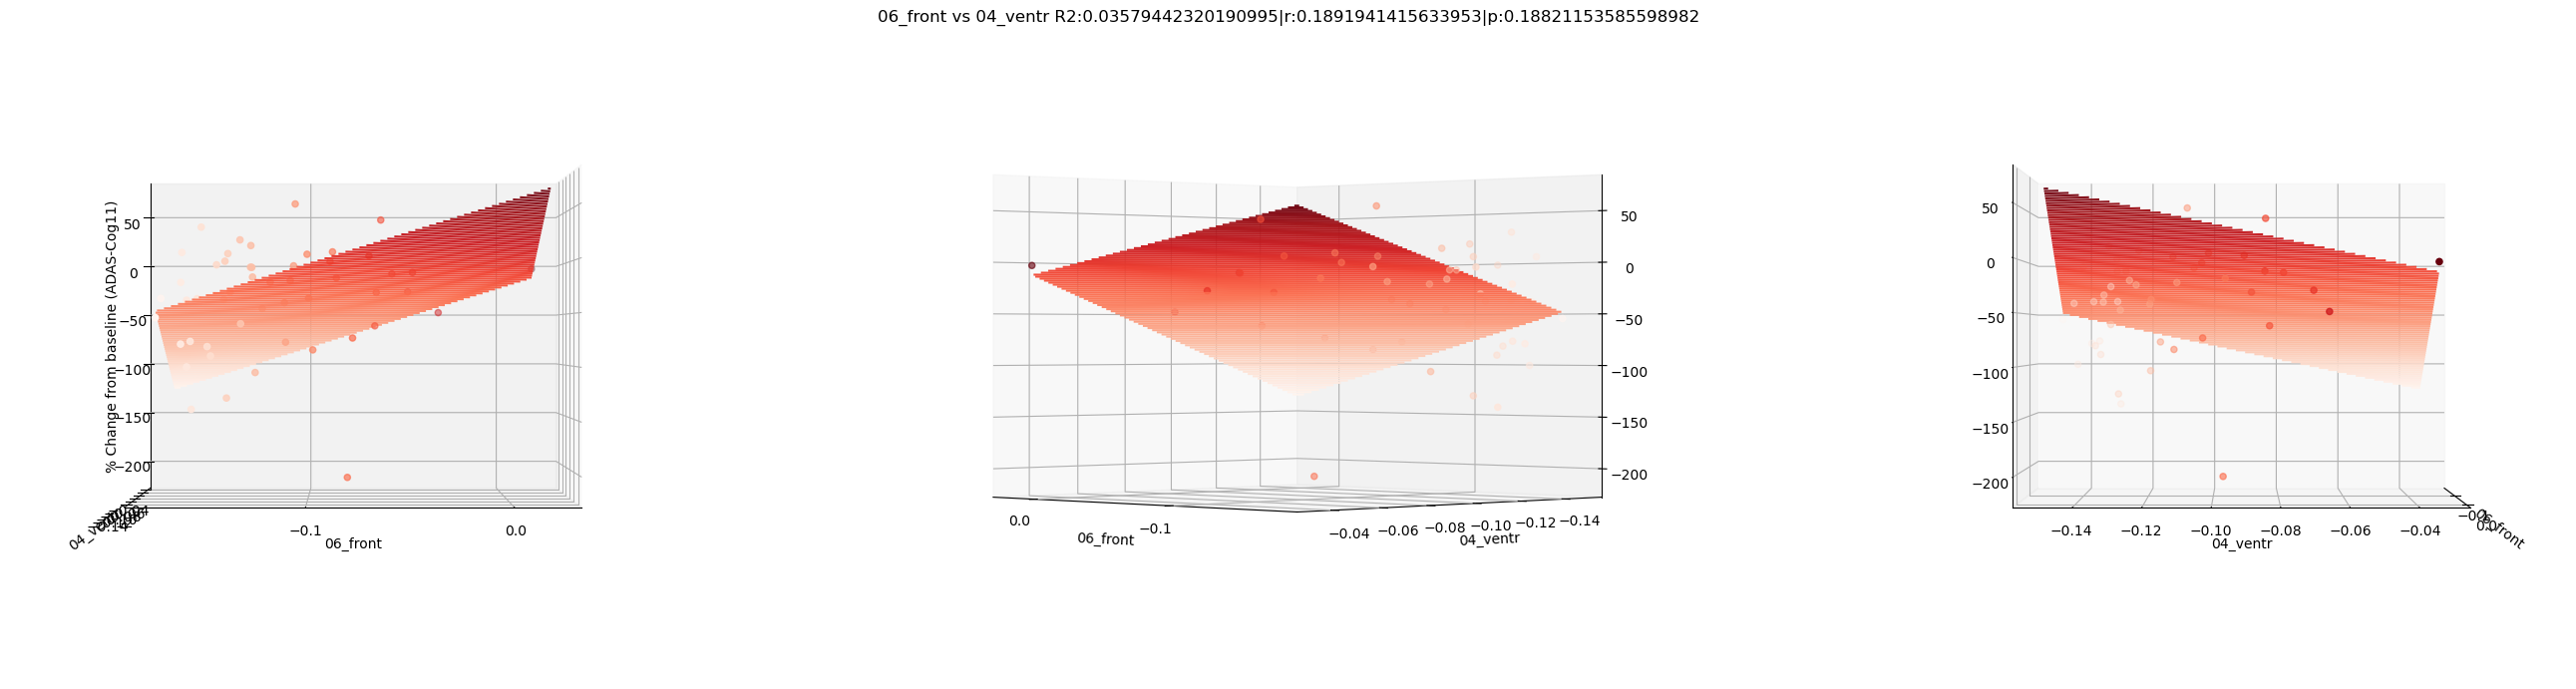

In [192]:
#Plot
plt.style.use('default')

#setup
fig = plt.figure(figsize=(30,7))
ax1 = fig.add_subplot(131, projection = '3d')
ax1.view_init(elev=0, azim=270)
ax2 = fig.add_subplot(132, projection = '3d')
ax2.view_init(elev=0, azim=135)
ax3 = fig.add_subplot(133, projection = '3d')
ax3.view_init(elev=0, azim=0)

ax1.set_zlabel(z_name, fontsize='10')
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.scatter3D(x_vals, y_vals, z_vals, c=x_vals, cmap='Reds', zorder=15, marker='o')

    ax.locator_params(nbins=4, axis='x')
    ax.set_xlabel(x_name, fontsize='10')
    ax.set_ylabel(y_name, fontsize='10')

    #Perform each regression
    coeffic1, r_sq1, r1, p1, x_plane1, y_plane1, z_plane1 = lin_regression(x_vals, y_vals, z_vals, degree=1)

    ax.contour(x_plane1, y_plane1, z_plane1, 100, cmap='Reds', alpha=0.95)#, zorder=15, marker=',')
fig.tight_layout()
fig.suptitle(f'{x_name} vs {y_name} R2:{r_sq1}|r:{r1}|p:{p1}')

In [193]:
#Store the associated coefficients and outputs in a CSV 
coeff_df = pd.DataFrame({f'Coefficients': coeffic1})
names_df = pd.DataFrame({'Coefficient Name': ['intersept', x_name, y_name]})
coeff_df = coeff_df.reset_index()
coeff_df = pd.concat([coeff_df, names_df], axis=1)
display(coeff_df)

,index,Coefficients,Coefficient Name
0,1,0.0000,intersept
1,x0,593.6800,06_front
2,x1,-672.7395,04_ventr


In [194]:
##Save the figure and coefficients
#Save
figname = '3D_' + x_name + '_by_' + y_name + '_explain_' + z_name
if os.path.isdir(out_dir) != True:
    os.mkdir(out_dir)
fig.savefig(os.path.join(out_dir, (figname+'_figure.png')))
coeff_df.to_csv(os.path.join(out_dir, (figname+'_coefficients.csv')))

print(f'{figname} saved to: \n {out_dir}')

3D_06_front_by_04_ventr_explain_% Change from baseline (ADAS-Cog11) saved to: 
 /Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/figures/multidimensional_scatterplots


## 4D Plots (Subgroupped)

r:  0.21785261759667524
p:  0.2158254797082688
coeff:  {'1': 0.0, 'x0': 509.896, 'x1': -549.4634}
r2:  0.04745976299372323
r:  0.3096943986375897
p:  0.24310151305849675
coeff:  {'1': 0.0, 'x0': -779.8907, 'x1': 2061.046}
r2:  0.09591062054749844
r:  0.21785261759667524
p:  0.2158254797082688
coeff:  {'1': 0.0, 'x0': 509.896, 'x1': -549.4634}
r2:  0.04745976299372323
r:  0.3096943986375897
p:  0.24310151305849675
coeff:  {'1': 0.0, 'x0': -779.8907, 'x1': 2061.046}
r2:  0.09591062054749844
r:  0.21785261759667524
p:  0.2158254797082688
coeff:  {'1': 0.0, 'x0': 509.896, 'x1': -549.4634}
r2:  0.04745976299372323
r:  0.3096943986375897
p:  0.24310151305849675
coeff:  {'1': 0.0, 'x0': -779.8907, 'x1': 2061.046}
r2:  0.09591062054749844


Text(0.5, 0.98, 'Age at DOS>65 R2:0.04745976299372323|r:0.21785261759667524|p:0.2158254797082688 \n Age at DOS<65 R2:0.09591062054749844|r:0.3096943986375897|p0.24310151305849675')

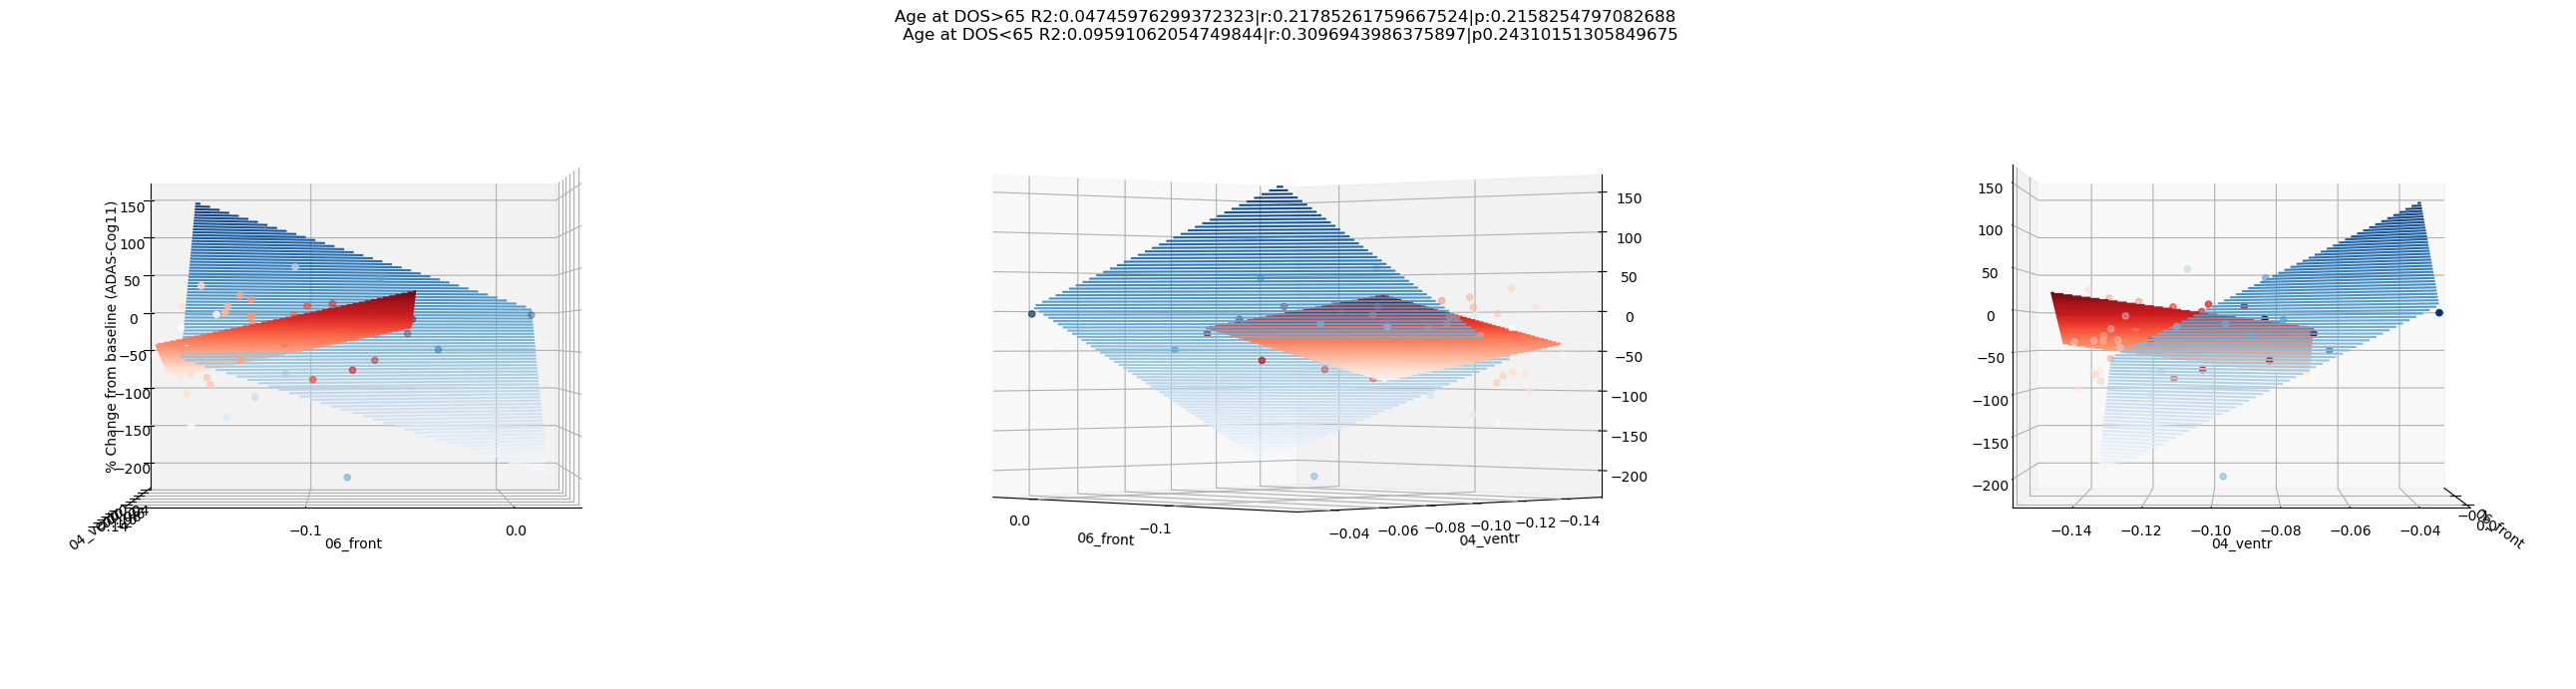

In [195]:

#Plot
plt.style.use('default')

#setup
fig = plt.figure(figsize=(30,7))
ax1 = fig.add_subplot(131, projection = '3d')
ax1.view_init(elev=0, azim=270)
ax2 = fig.add_subplot(132, projection = '3d')
ax2.view_init(elev=0, azim=135)
ax3 = fig.add_subplot(133, projection = '3d')
ax3.view_init(elev=0, azim=0)

ax1.set_zlabel(z_name, fontsize='10')
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.scatter3D(x_vals.loc[index_one], y_vals.loc[index_one], z_vals.loc[index_one], c=x_vals.loc[index_one], cmap='Reds', zorder=15, marker='o')
    ax.scatter3D(x_vals.loc[index_two], y_vals.loc[index_two], z_vals.loc[index_two], c=x_vals.loc[index_two], cmap='Blues', zorder=15, marker='o')

    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=4, axis='x')

    ax.set_xlabel(x_name, fontsize='10')
    ax.set_ylabel(y_name, fontsize='10')

    #Perform each regression
    coeffic1, r_sq1, r1, p1, x_plane1, y_plane1, z_plane1 = lin_regression(x_vals.loc[index_one], y_vals.loc[index_one], z_vals.loc[index_one], degree=1)
    coeffic2, r_sq2, r2, p2, x_plane2, y_plane2, z_plane2 = lin_regression(x_vals.loc[index_two], y_vals.loc[index_two], z_vals.loc[index_two], degree=1)

    ax.contour(x_plane1, y_plane1, z_plane1, 100, cmap='Reds', alpha=0.95)#, zorder=15, marker=',')
    ax.contour(x_plane2, y_plane2, z_plane2, 100, cmap='Blues', alpha=0.95)#, zorder=15, marker=',')
fig.tight_layout()
fig.suptitle(f'{metric}>{metric_val} R2:{r_sq1}|r:{r1}|p:{p1} \n {metric}<{metric_val} R2:{r_sq2}|r:{r2}|p{p2}')


In [196]:
#Store the associated coefficients and outputs in a CSV 
coeff_df = pd.DataFrame({f'{metric}>{metric_val}': coeffic1, f'{metric}<{metric_val}': coeffic2})
name_df = pd.DataFrame({'Coeff Names': ['intersept', x_name, y_name]})
coeff_df = coeff_df.reset_index()
coeff_df = pd.concat([coeff_df, name_df], axis=1)
display(coeff_df)

,index,Age at DOS>65,Age at DOS<65,Coeff Names
0,1,0.0000,0.0000,intersept
1,x0,509.8960,-779.8907,06_front
2,x1,-549.4634,2061.0460,04_ventr


In [197]:
#Save
figname = '4D_' + x_name + '_by_' + y_name + '_explain_' + z_name
if os.path.isdir(out_dir) != True:
    os.mkdir(out_dir)
fig.savefig(os.path.join(out_dir, (figname+'_figure.png')))
coeff_df.to_csv(os.path.join(out_dir, (figname+'_coefficients.csv')))
print(f'{figname} saved to: \n {out_dir}')

4D_06_front_by_04_ventr_explain_% Change from baseline (ADAS-Cog11) saved to: 
 /Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/figures/multidimensional_scatterplots
